# Project goals

To look at final MLB standings to determine if there has been a change in any competitive statistics over the past 3-5 years, including distribution of win percentages, inter-division competitiveness, and run differential.

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None
import dc_stat_think as dcst

In [2]:
## Read in datasets. The first is the standings data, while the second is game-by-game granular data

df_standings = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\baseballdatabank-2017.1\Project_Quality\standings_scrape.csv', index_col='year')

df_games = pd.DataFrame()

for i in range (1990, 2018):
    
    df = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\baseballdatabank-2017.1\Project\Game Data\GL%s.txt' % i,header=None)
    
    df_games = pd.concat([df_games, df])
    
df_games = df_games.iloc[:,np.r_[0,2:11, 12, 16:19, 21:27, 30, 32, 38, 49:55, 58, 60, 66, 160]]
cols = ['Date','Day_of_week','Visitor','V_league','V_game_num','Home','H_league','H_game_num','V_score','H_score','Time_of_day','Park','Attendance','Game_time','V_atbats','V_hits','V_doubles','V_triples','V_hr','V_rbi','V_bb','V_strikeouts','V_pitchersused','H_atbats','H_hits','H_doubles','H_triples','H_hr','H_rbi','H_bb','H_strikeouts','H_pitchersused','Data_quality']
df_games.columns = cols

df_standings.sample(5)

,team,wins,losses,win_loss_perc,games_back
year,,,,,
2005,Chicago Cubs,79,83,0.488,21
2012,Philadelphia Phillies,81,81,0.500,17
1976,New York Yankees,97,62,0.610,--
2008,Washington Nationals,59,102,0.366,32.5
1975,Boston Red Sox,95,65,0.594,--


In [3]:
## Check the data types and if there are any missing values

print('The data types are:\n')
print(df_standings.dtypes)
print('\nThe number of missing values is:\n')
print(df_standings.isnull().sum())

The data types are:

team              object
wins               int64
losses             int64
win_loss_perc    float64
games_back        object
dtype: object

The number of missing values is:

team             0
wins             0
losses           0
win_loss_perc    0
games_back       0
dtype: int64


In [4]:
## Clean and format columns

df_standings['games_back'].replace({'--':0}, inplace=True)
df_standings['games_back'] = pd.to_numeric(df_standings['games_back'])

df_standings.index = pd.to_datetime(df_standings.index, format='%Y')
df_standings.index = df_standings.index.year

df_standings.head(10)

,team,wins,losses,win_loss_perc,games_back
year,,,,,
1970,Baltimore Orioles,108,54,0.667,0.0
1970,New York Yankees,93,69,0.574,15.0
1970,Boston Red Sox,87,75,0.537,21.0
1970,Detroit Tigers,79,83,0.488,29.0
1970,Cleveland Indians,76,86,0.469,32.0
1970,Washington Senators,70,92,0.432,38.0
1970,Minnesota Twins,98,64,0.605,0.0
1970,Oakland Athletics,89,73,0.549,9.0
1970,California Angels,86,76,0.531,12.0


In [103]:
## 1981 data needs to be tweaked because the players went on strike mid-season. This resulted in first-half data,
## second half data, and overall data on the website that I scraped from. Therefore, in order to make sure we have
## only the full year data, I've created a number of games variable and filtered the dataset for only the values
## where number of games is above 100, which eliminates the non-full season values.

df_standings['num_games'] = df_standings['wins'] + df_standings['losses']
df_standings = df_standings[df_standings['num_games'] > 100]

print('The number of teams for 1981 in the data set is: ')
print(df_standings[df_standings.index == 1981]['team'].value_counts().sum()) # Ensure that the data was correctly filtered

The number of teams for 1981 in the data set is: 
26


In [105]:
## Create a list for the number of teams that are below .500 in a given year and the difference between the 
## maximum and minimum win percentage in a given year. The goal of analysis 1 is to see if more teams are finishing the
## year under .500 than normal, showing more dispersion between the "good" and "bad" teams. The goal of analysis 2
## is to see the difference between the best and worst teams in a given year.

teams_under_500 = []
max_winpct_diff = []

for yr in range(1970, 2018):
    
    yr_data = df_standings[df_standings.index == yr]
    counter = 0
    
    for val in yr_data['win_loss_perc']: 
        if val < 0.5: # Logic statement for whether the team had a win percentage below .500
            counter +=1
            
    max_winpct = yr_data['win_loss_perc'].max()
    min_winpct = yr_data['win_loss_perc'].min()
    max_min_diff = max_winpct - min_winpct
    
    max_winpct_diff.append(max_min_diff)
    teams_under_500.append(counter / len(set(yr_data['team']))) # Normalize number as % of total teams because league expanded

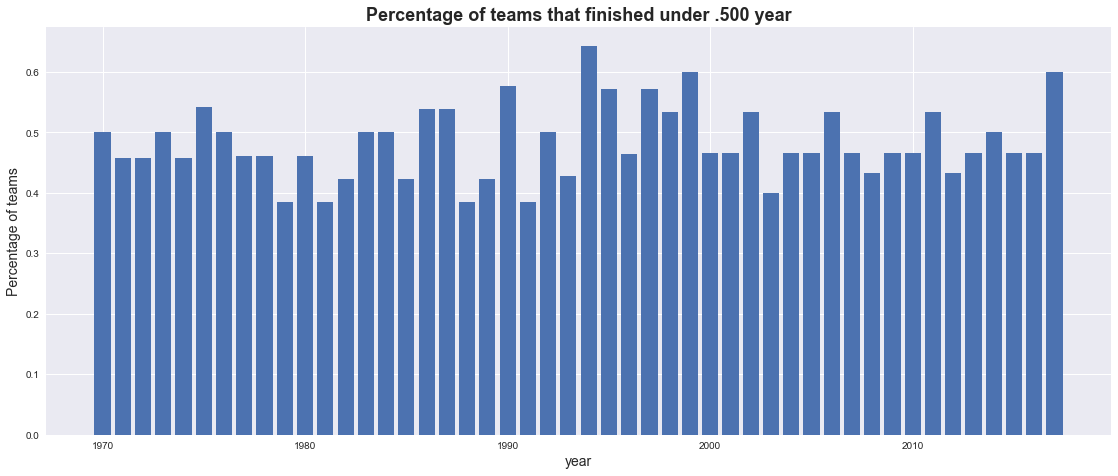

In [102]:
## Plot the total number of teams under .500 as a percentage of total teams. We would expect this value, based on the
## distribution of win percentage, to be around 50% in a given year.

plt.figure(figsize=(17, 7))
plt.bar(x=range(1970, 2018), height=teams_under_500)
plt.title('Percentage of teams that finished under .500 year', fontsize=18, fontweight='bold')
plt.ylabel('Percentage of teams', fontsize=14)
plt.xlabel('year', fontsize=14)

plt.show()

As expected, the data generally centers around 50% of teams finishing below .500, but 2017 showed a marked spike in teams, with the number reaching 60%. One interpretation of this would be there were more "very good" teams and more "very bad" teams in 2017 relative to prior years and the competitive balance of previous seasons didn't exist to the same degree.

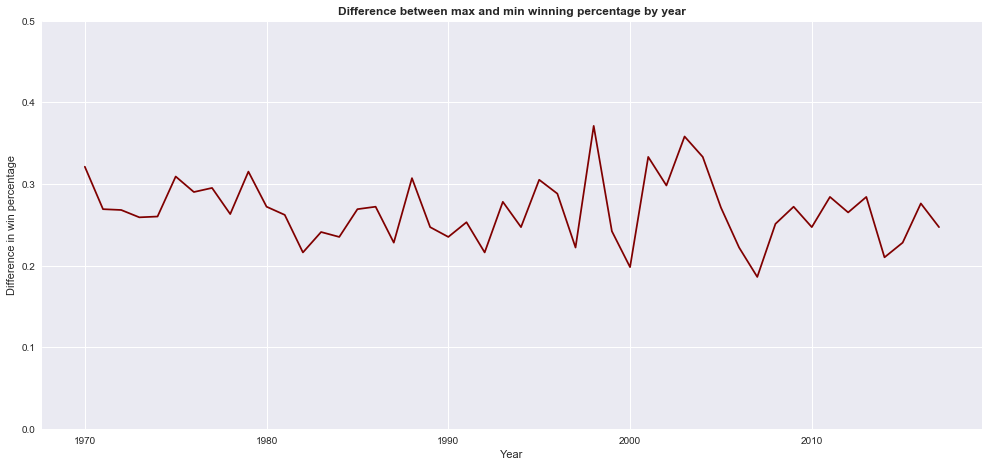

In [106]:
## Plot the change between the maximum and minimum winning percentage by year

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(range(1970, 2018), max_winpct_diff, color='maroon')
ax.set_title('Difference between max and min winning percentage by year', fontweight='bold')
ax.set_ylabel('Difference in win percentage')
ax.set_xlabel('Year')
ax.set_ylim([0, 0.5])

plt.show()

There are no noteworthy shifts in this variable, so from an "extremes" perspective, there haven't been instances of high over- and under-performance in recent years.

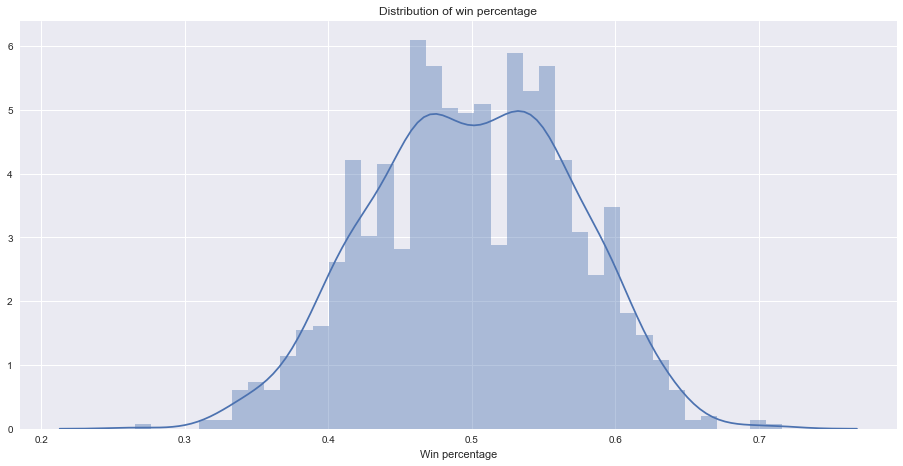

count    1324.000000
mean        0.499999
std         0.069201
min         0.265000
25%         0.451000
50%         0.500000
75%         0.549000
max         0.716000
Name: win_loss_perc, dtype: float64


In [107]:
## Distribution of win-loss percentage

plt.figure(figsize=(14, 7))
sns.distplot(df_standings['win_loss_perc'], bins=40)
plt.title('Distribution of win percentage')
plt.xlabel('Win percentage')

plt.show()

print(df_standings['win_loss_perc'].describe())

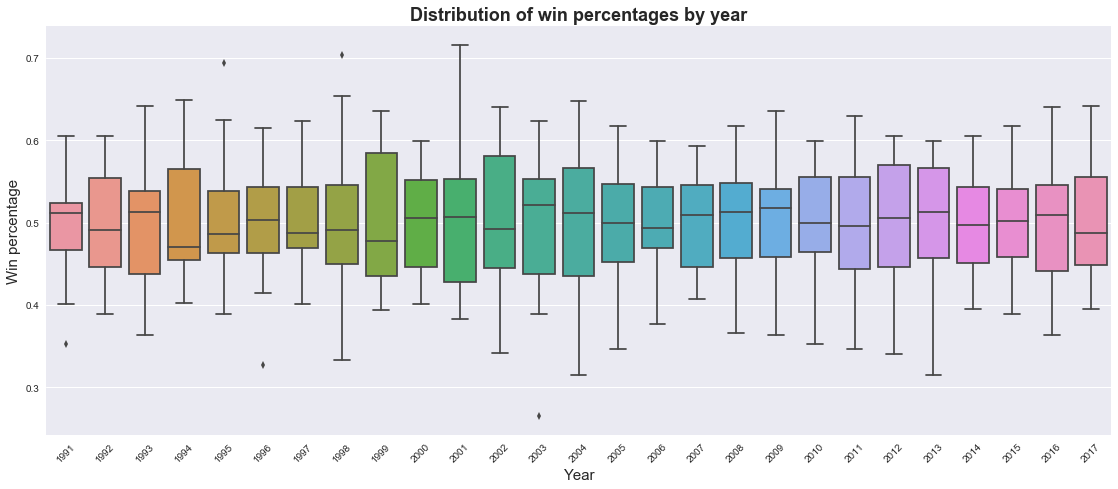

In [108]:
## Plot the win distributions on an annual basis with boxplots to see how the distribution may have changed over time.

fig, ax = plt.subplots(figsize=(17, 7))

sns.boxplot(x=df_standings[df_standings.index > 1990].index, y='win_loss_perc', data=df_standings[df_standings.index > 1990])
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of win percentages by year', fontsize=18, fontweight='bold')
ax.set_ylabel('Win percentage', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

plt.show()

Another variable that shows slight changes. The top end of the quartile has seen a mild increase from 2012-2016 and remained steady in 2017. Also, the median value has dropped and is at or near a multi-decade low as of 2017.

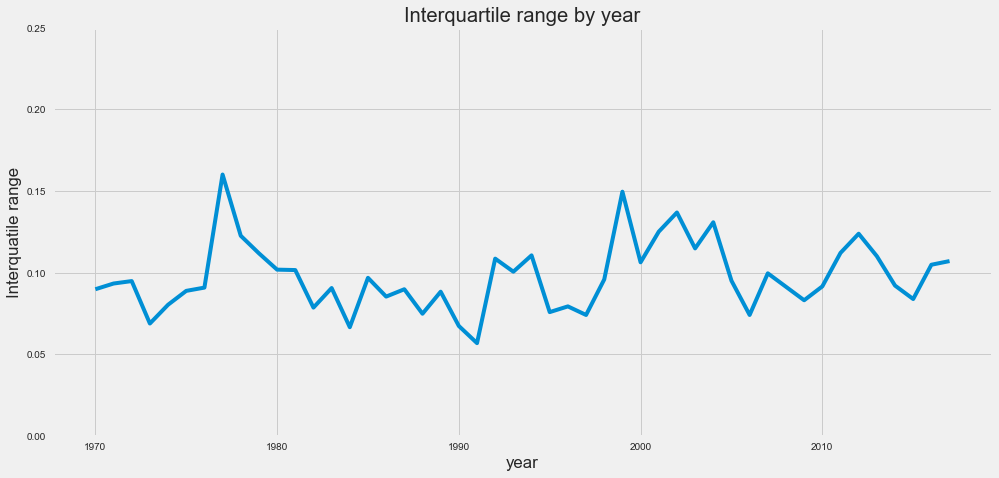

In [43]:
## Difference between 75th percentile and 25th percentile win percentage

interquartile_range = []

for yr in set(df_standings.index):
    
    df_yr = df_standings[df_standings.index == yr]
    perc_75 = df_yr['win_loss_perc'].quantile(.75)
    perc_25 = df_yr['win_loss_perc'].quantile(.25)
    
    interquartile_range.append(perc_75-perc_25)
    
plt.figure(figsize=(15, 7))
plt.plot(range(1970, 2018), interquartile_range)
plt.title('Interquartile range by year')
plt.ylabel('Interquatile range')
plt.xlabel('year')
plt.ylim([0, 0.25])

plt.show()

The interquartile range, or difference between the slightly overperforming (75th percentile) and slightly underperforming (25th percentile) value doesn't show any significant areas of concern. 

So, we've now established that the outlier behavior is not concerning (best and worst teams), and the "kind of good" and "kind of bad" behavior is not a concern. What did show outlier behavior was the middle-of-the-road teams (median value being lower) and quantity of teams that fall below .500.

In [12]:
## See how the run differential has changed over time

df_games['run_diff'] = abs(df_games['V_score'] - df_games['H_score'])
df_games['Date'] = pd.to_datetime(df_games['Date'], format='%Y%m%d')
df_games.set_index(df_games['Date'], inplace=True)

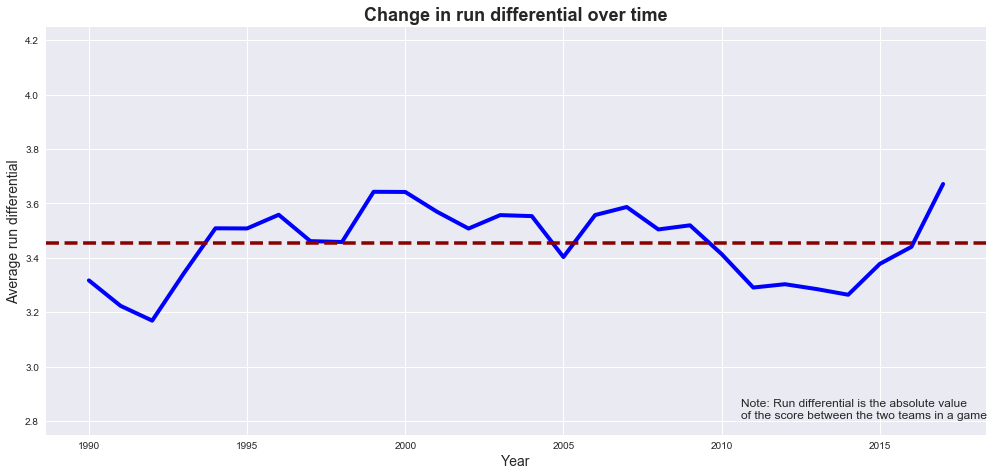

In [87]:
## Plot the change in run differential over time

ax = plt.subplots(figsize=(15, 7))
ax = df_games.groupby(by=df_games.index.year)['run_diff'].mean().plot(linewidth=4, color='blue')
ax.set_ylim([2.75, 4.25])
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average run differential', fontsize=14)
ax.set_title('Change in run differential over time', fontweight='bold', fontsize=18)
ax.annotate('Note: Run differential is the absolute value \nof the score between the two teams in a game', (2010.6, 2.81))
ax.axhline(df_games['run_diff'].mean(), color='darkred', linestyle='dashed', linewidth=3.5)

plt.show()

Run differential shows an upward trend from 2014-2017 and has overindexed relative to the mean in the past two years.

[]

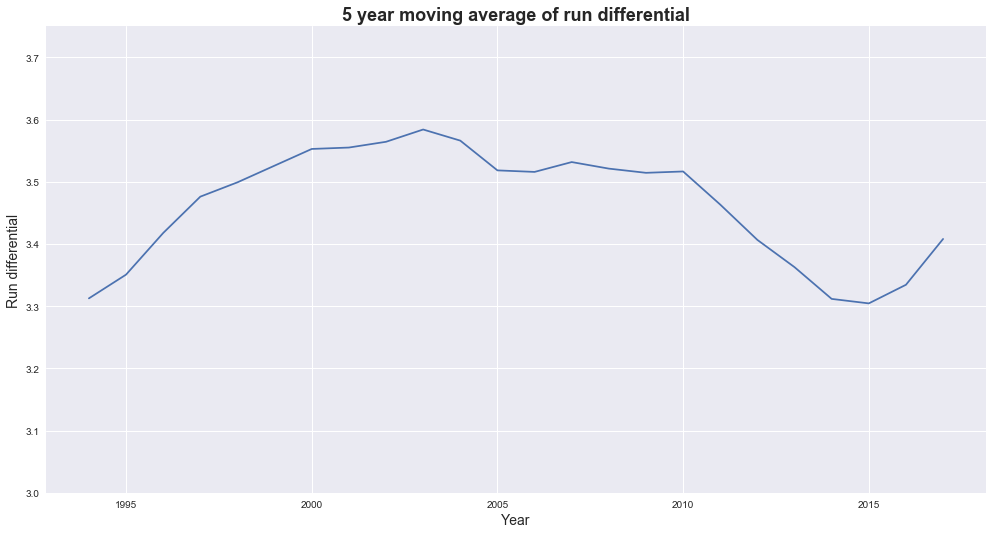

In [110]:
## Plot the five-year moving average

grpd = df_games.groupby(by=df_games.index.year).mean()
run_diff_5year = grpd['run_diff'].rolling(window=5).mean()

fig, ax = plt.subplots(figsize=(15, 8))

run_diff_5year.plot()
ax.set_title('5 year moving average of run differential', fontweight='bold', fontsize=18)
ax.set_ylabel('Run differential', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylim([3, 3.75])

plt.plot()

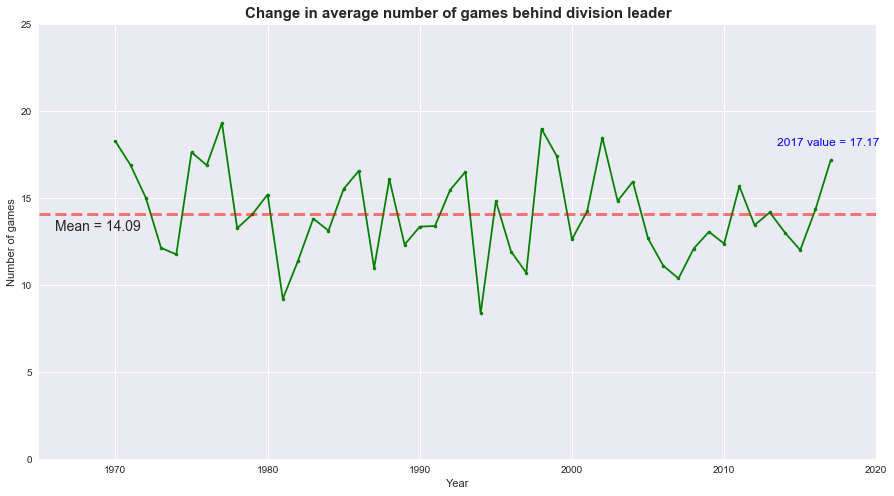

In [28]:
## Group the data and see how the average games back has trended over time

grouped = df_standings.groupby(by=df_standings.index).mean()

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(grouped['games_back'], marker='.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Number of games')
ax.set_title('Change in average number of games behind division leader', fontweight='bold', fontsize=15)
ax.set_ylim([0, 25])
ax.set_xlim([1965,2020])
ax.axhline(df_standings['games_back'].mean(), color='red', linestyle='dashed', alpha=0.5, linewidth=3)
ax.annotate('Mean = %.2f' %df_standings['games_back'].mean(), (1966, df_standings['games_back'].mean()-1), size=14)
ax.annotate('2017 value = %.2f' %df_standings[df_standings.index == 2017]['games_back'].mean(), (2013.5, 18), size=12, color='blue')

plt.show()

The average number of games back masks some trends (i.e. for the team that came in second, how close were they?), but it does give an indication of overall competitiveness throughout the season (lower values = more teams are competitive or there are less extremely bad teams that would change the average). We'll also plot the median to mitigate the potential bias of outlier values and validate the trend.

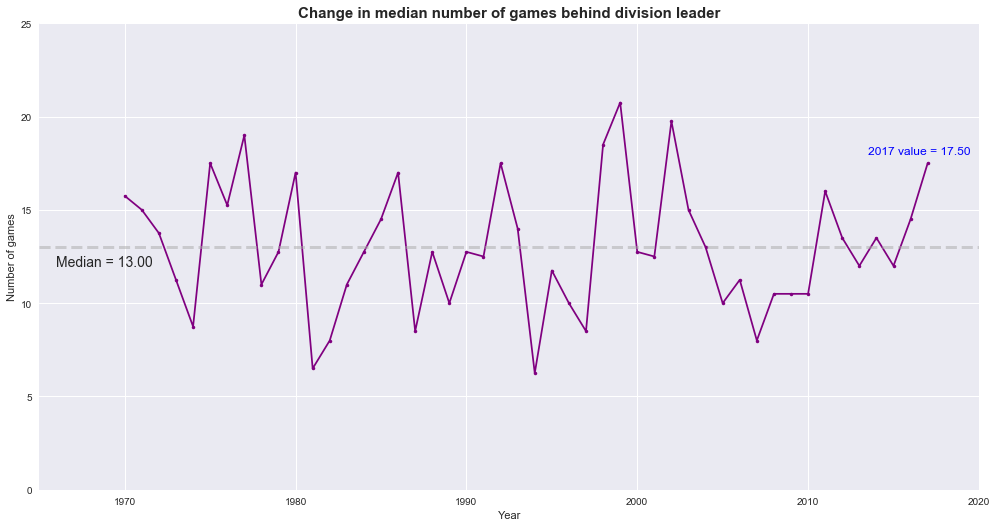

In [117]:
## Plot the median values

grouped_median = df_standings.groupby(by=df_standings.index).median()

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(grouped_median['games_back'], marker='.', color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Number of games')
ax.set_title('Change in median number of games behind division leader', fontweight='bold', fontsize=15)
ax.set_ylim([0, 25])
ax.set_xlim([1965,2020])
ax.axhline(df_standings['games_back'].median(), color='darkgray', linestyle='dashed', alpha=0.5, linewidth=3)
ax.annotate('Median = %.2f' %df_standings['games_back'].median(), (1966, df_standings['games_back'].median()-1), size=14)
ax.annotate('2017 value = %.2f' %df_standings[df_standings.index == 2017]['games_back'].median(), (2013.5, 18), size=12, color='blue')

plt.show()

Indeed, the trend is validated with the median value as well, showing above-trend behavior over the past two years with the 2017 value being on the upper end of the time range.

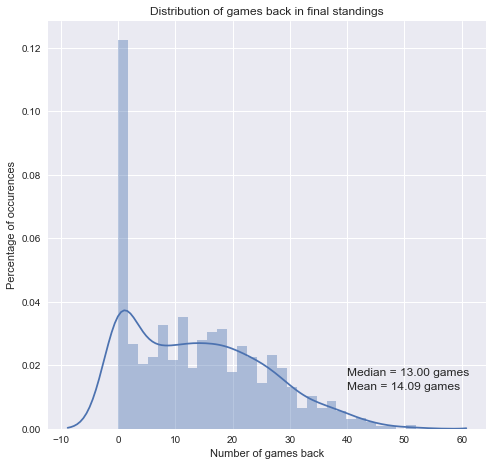

In [121]:
## Distribution of games back

fig, ax = plt.subplots(figsize=(7, 7))

ax = sns.distplot(df_standings['games_back'], bins=30)
ax.set_ylabel('Percentage of occurences')
ax.set_xlabel('Number of games back')
ax.set_title('Distribution of games back in final standings')
ax.annotate('Mean = %.2f games' %df_standings['games_back'].mean(), (40, 0.0125))
ax.annotate('Median = %.2f games' %df_standings['games_back'].median(), (40, 0.017))

plt.show()

It makes sense that 0 would be the most common value because every season that value will be present for each division winner. After that, we see a fairly even and consistent distribution with a tail that extends as long as nearly 60 games.

In [15]:
## Determine a cutoff point for analysis. We will try the 75th percentile.

perc_75 = np.percentile(df_standings['games_back'], [75])

print('The 75th percentile value for games back is %.2f games' %perc_75)

The 75th percentile value for games back is 22.50 games


In [16]:
## Pecentage of teams more than 22.5 games back at end of year

gms_back = []

for yr in range(1970, 2018):
    
    counter = 0
    
    df_yr = df_standings[df_standings.index == yr]
    
    for val in df_yr['games_back']:
        
        if val > perc_75:
            counter +=1
            
    counter = counter / len(set(df_yr['team']))
    gms_back.append(counter)

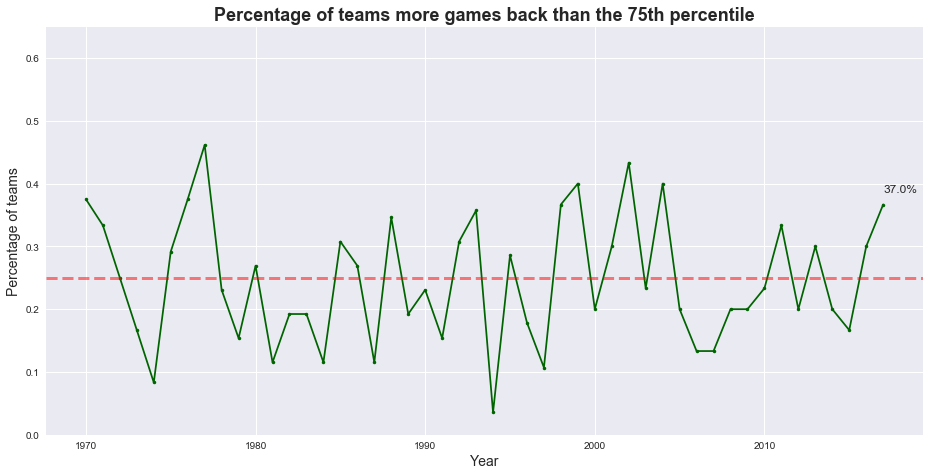

In [68]:
## Plot the change in % of teams more than 22.5 games back    

fig, ax = plt.subplots(figsize=(14, 7))

plt.plot(range(1970, 2018), gms_back, color='darkgreen', marker='.')
ax.set_ylabel('Percentage of teams', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_title('Percentage of teams more games back than the 75th percentile', fontweight='bold', fontsize=18)
ax.axhline(0.25, color='red', linestyle='dashed', linewidth=3, alpha=0.5)
ax.set_ylim([0, 0.65])
ax.annotate(str(round(gms_back[-1], 2)*100)+'%', (2017, gms_back[-1]+0.02))

plt.show()

This variable is intended to measure how many "very bad" teams there were in a given year. The baseline value would be 25% (since we're looking at teams relative to the 75th percentile), and we see that 2017 had a higher-than-average value for number of teams above this value.

# Conclusion

Though the magnitude of the changes weren't always as apparent, it looks like 2016 and 2017 showed abnormally "un-competitive" behavior. The quality of the on-field product is crucially important for fan engagement, and having more teams finish below-.500 and/or less competitive throughout the season could be a contributing factor to why fans are not showing up as regularly for games.